## Introduction:
    Here, we will analyse step by step each individual feature of dataset having records about the dimensions of Iris flower. Later we will show how to prepare data for model building. After that we will create comparison plot for various algorithm's performance and finally hyper tune the parameters for one best working algorithm.

## Dataset Features:

#### 'sepal length' --> 

                  represents sepal lengths data for Iris flower
                    
                  Feature with continuous numerical values

#### 'sepal width' --> 
                    
                  represents sepal width data for Iris flower

                  Feature with continuous numerical values  

#### 'petal length' --> 
                    
                   represents petal length data for Iris flower

                   Feature with continuous numerical values

#### 'petal width' --> 
                    
                   represents petal width data for Iris flower

                   Feature with continuous numerical values
                   
#### 'class' -->

                    represent 3 species of Iris flower 
                    
                    Categorical feature with nominal values

## Import libraries

In [1]:
# Data wrangling and analysis
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

## import dataset

In [2]:
df=pd.read_csv('iris1.csv')

## Descriptive Analysis

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,NaN,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

Our dataset has 150 rows of data which is divided into 4 independent features which have information about the dimensions of leaves of Iris flower and one target feature which has 3 varieties of Iris flower.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   145 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We observe that **sepal width and petal width** features have some data missing and all independent features are **float64** datatype while our target feature is **object** type.

In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,147.000000,150.000000,145.000000
mean,5.843333,3.027891,3.758667,1.229655
std,0.828066,0.503247,1.764420,0.757199
min,4.300000,0.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**.describe()** method shows us the **statistical summary of numerical features** in the dataset. We see the *count* of records in each numerical feature is not same across all columns, which *indicates missing values in some features*. There is *significant difference between the mean and median values of petal length* feature which *indicates skewness present* in the data distribution of the feature. The *standard deviation* of data distributed in *all features is seems to be almost negligible.*

In [8]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

We have two types of variable data present:
    
    Numerical conitnuous features - sepal length, sepal width, petal length, petal width
    
    Categorical features - class

In [9]:
df_dup=df[df.duplicated()]
df_dup.shape

(3, 5)

We have encountered $3$ *duplicated* records in our dataset. We will first check them before removing them.

In [10]:
df_dup

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


We will remove these $3$ duplicated records from our dataset to make more accurate model.

In [11]:
df.shape

(150, 5)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(147, 5)

In [14]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+'%'

sepal length     0.0%
sepal width     2.04%
petal length     0.0%
petal width      3.4%
class            0.0%
dtype: object

We see very less percentage of data is missing from **sepal width and petal width** features, we will handle this missing data in data pre-processing steps.

## Univariate analysis of features

We will analyse various features of the dataset individually to understand it's impact on the target feature.

#### 1. 'sepal length'

In [15]:
df['sepal length'].dtype

dtype('float64')

In [16]:
df['sepal length'].describe()

count    147.000000
mean       5.856463
std        0.829100
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length, dtype: float64

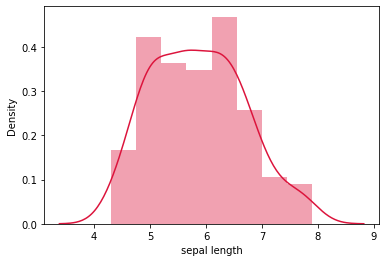

In [17]:
sn.distplot(df['sepal length'],color='crimson')
plt.show()

We observe that the mean sepal length of iris flower is around $5.8$. The data **distribution** of this column **is normal bell shaped curve**. The **minimum** sepal length is $4.3$ and **maximum** sepal length is $7.9$.

#### 2. 'sepal width'

In [18]:
df['sepal width'].dtype

dtype('float64')

In [19]:
df['sepal width'].describe()

count    144.000000
mean       3.029167
std        0.507686
min        0.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width, dtype: float64

<AxesSubplot:xlabel='sepal width', ylabel='Density'>

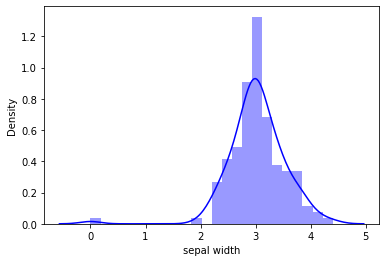

In [20]:
sn.distplot(df['sepal width'],color='blue')

We see that the **mean sepal width** of iris flower is $3$. The **minimum** sepal width is $0$ and **maximum** sepal width is $4.4$. The data **distribution is bell shaped**.

#### 3. 'petal length'

In [21]:
df['petal length'].dtype

dtype('float64')

In [22]:
df['petal length'].describe()

count    147.000000
mean       3.780272
std        1.759111
min        1.000000
25%        1.600000
50%        4.400000
75%        5.100000
max        6.900000
Name: petal length, dtype: float64

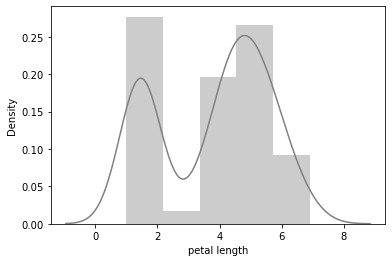

In [24]:
sn.distplot(df['petal length'],color='grey')
plt.show()

We see that the **mean petal length** of iris flower is $3.78$, but from the distribution plot we see the presence of two maxima mean values. The **minimum** petal length is $1$ and the **maximum** petal length is $6.9$. We also see the **mean value is less than median** meaning the **distribution is left skewed**. We will handle the skewness in data preprocessing steps.

#### 4. 'petal width'

In [25]:
df['petal width'].dtype

dtype('float64')

In [26]:
df['petal width'].describe()

count    142.000000
mean       1.240845
std        0.751090
min        0.100000
25%        0.325000
50%        1.350000
75%        1.800000
max        2.500000
Name: petal width, dtype: float64

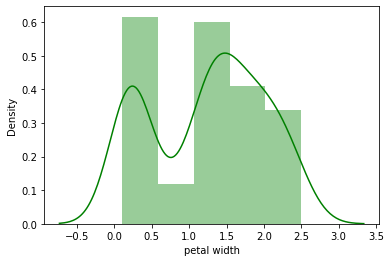

In [28]:
sn.distplot(df['petal width'],color='green')
plt.show()

We see that the **mean petal width** of iris flower is $1.2$ , but we see *two maxima mean* values from the distplot. The **minimum** petal width is $0.10$ and the **maximum** petal width is $2.5$.

## Bivariate Analysis

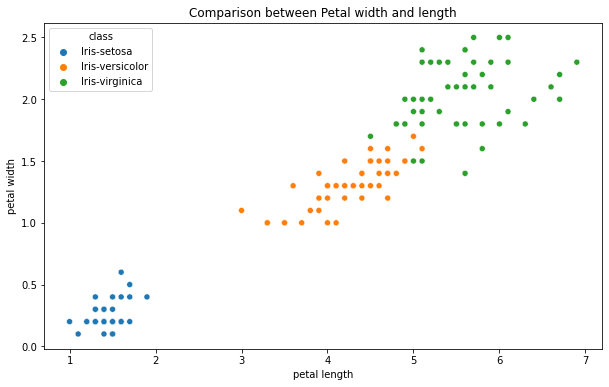

In [31]:
plt.figure(figsize=[10,6])
plt.title("Comparison between Petal width and length")
sn.scatterplot(df['petal length'],df['petal width'],hue=df['class'])
plt.show()

From above plot, we see **not straight-forward linear relationship between **petal length** and **petal width**, but mix of linear and saturated relationship. **As the petal length increases, the petal width is also increasing but not always.** In some cases, as the petal length is increasing,the petal width may remain same as it's nearest previous value. We also see that, **Iris-seosa** class flowers are having **smallest petal length and petal width**, **Iris-versicolor** class flowers are having **intermediate petal length and petal width** while **Iris-virginica** class flowers are having the **highest petal length and petal width**.

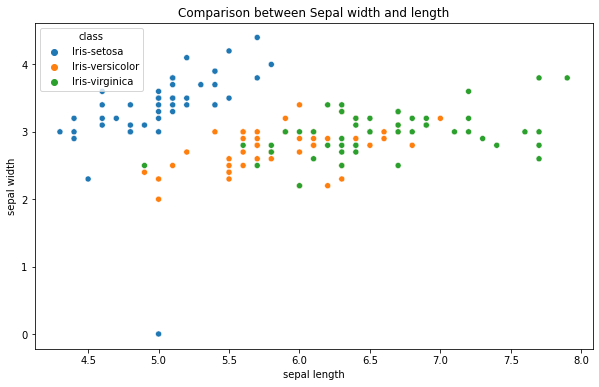

In [34]:
plt.figure(figsize=[10,6])
plt.title("Comparison between Sepal width and length")
sn.scatterplot(df['sepal length'],df['sepal width'],hue=df['class'])
plt.show()

From above plot, we **do not see any linear relationship between Sepal width and Sepal length.** The sepal width of iris flower is roughly spread in the range between 2-5. As the sepal lenght increases, the sepal width is fluctuating low and high between 2-5. For **Iris-setos** class flowers, the **sepal length is minimum** while for **Iris-virginica** the **sepal length is maximum**.

In [35]:
corr=df.corr()

In [36]:
corr

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.038642,0.871305,0.816055
sepal width,-0.038642,1.000000,-0.302854,-0.203830
petal length,0.871305,-0.302854,1.000000,0.960447
petal width,0.816055,-0.203830,0.960447,1.000000


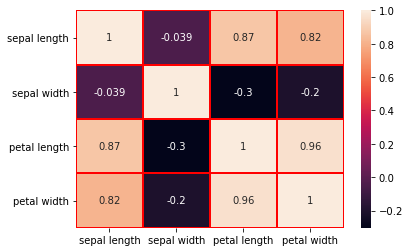

In [37]:
sn.heatmap(corr,annot=True,linewidths=1,linecolor='red')
plt.show()

After plotting the correlation between all numerical features, we see that **petal length and sepal length** , **petal width and sepal length**, **petal width and petal length** are highly collinear with each other.

## Data Pre-processing

#### missing value treatment

In [38]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+'%'

sepal length     0.0%
sepal width     2.04%
petal length     0.0%
petal width      3.4%
class            0.0%
dtype: object

The data in the column **sepal width** is normally distributed,so we will replace missing value with mean

In [39]:
df['sepal width']=df['sepal width'].fillna(df['sepal width'].mean())

The data in the column **petal width** is not normally distributed, so we will replace missing value with median.

In [40]:
df['petal width']=df['petal width'].fillna(df['petal width'].median())

In [41]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+'%'

sepal length    0.0%
sepal width     0.0%
petal length    0.0%
petal width     0.0%
class           0.0%
dtype: object

We have **replaced missing values** from *'sepal width' column with mean of that column* and the missing values from *'petal width' column are replaced with the median of that column.*

#### Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])

#### Outliers handling

In [42]:
numerical_cols=[]
numerical_cols.clear()
for column in df:
    if df[column].dtypes!='object':
        numerical_cols.append(column)

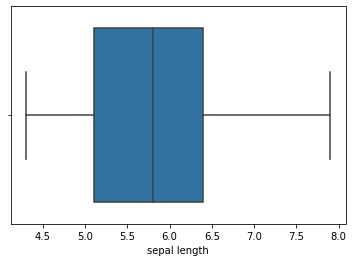

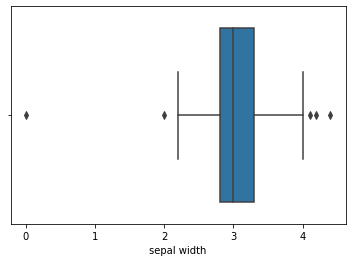

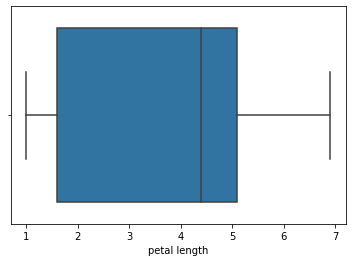

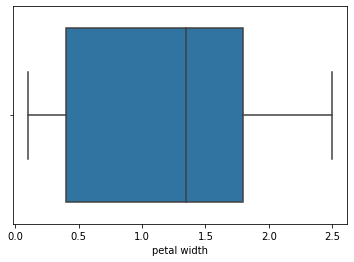

In [43]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.boxplot(df[column])
    ax.set_xlabel(column)
    plt.show()

From above boxplots for numerical columns in the dataset, we observe outlying values present in the **sepal width** column,

#### removing outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [49]:
new_df.shape

(146, 5)

In [50]:
df.shape

(147, 5)

In [51]:
# %ge of data loss
(1/147)*100

0.6802721088435374

**Less than 1% data loss** after outlier removal, 1 row is dropped.

#### skewness

check the skewness

In [52]:
df.skew()

sepal length    0.292560
sepal width    -1.192030
petal length   -0.293763
petal width    -0.203060
class          -0.012561
dtype: float64

Data is not **highly skewed to affect the analysis.**

#### split dataset into independent and target variables

In [53]:
x=new_df.drop('class',axis=1)
y=new_df['class']

In [54]:
print(x.shape)
print(y.shape)

(146, 4)
(146,)


#### scaling the dataset to make all values uniform with each other irrespective of their measured units

In [55]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [56]:
for col in x.columns:
    x[col]=s.fit_transform(x[col].values.reshape(-1,1))

#### finding the best random state

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [64]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred_dtc=dtc.predict(x_test)
    if accuracy_score(y_test,pred_dtc)>maxAcc:
        maxAcc=accuracy_score(y_test,pred_dtc)
        maxRS=i
print("Best Accuracy is ",maxAcc," at random state ",maxRS)

Best Accuracy is  1.0  at random state  19


## Model building

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=19)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [68]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [69]:
#Cross validation
model_names = []
model_names.append(('Decision Tree', dt))
model_names.append(('Random Forest', rf))
model_names.append(('KNN', knn))

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
scoring = 'accuracy'
seed=7
for name, model in model_names:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    res = "%s: %f " % (name, cv_results.mean())
    print(res)

Decision Tree: 0.952381 
Random Forest: 0.945238 
KNN: 0.938571 


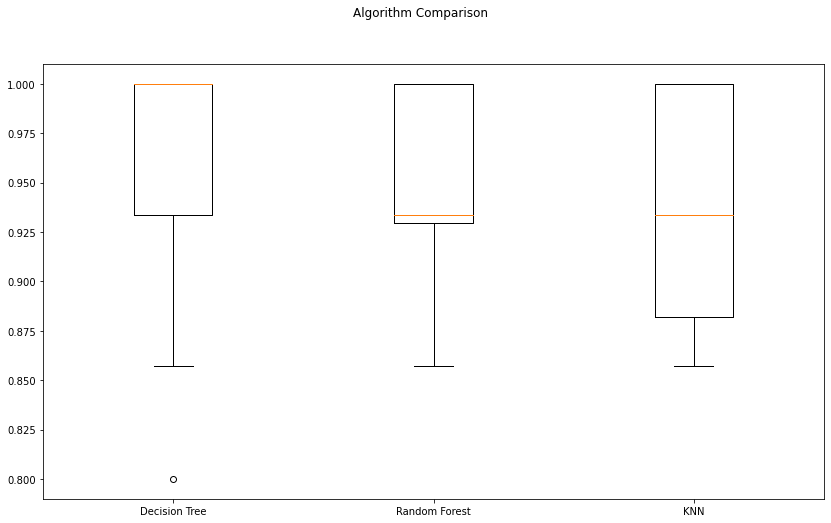

In [71]:
#Boxplot for algorithm comparision

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### We will proceed with DecisionTreeClassifier for our model building

In [72]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc)*100)

95.91836734693877


#### step- hyper parameter tuning

We decided that **Decision Tree Classifier** is our best model based on acc score and cross val score, but we can improve acc score by hyperparameter tuning

In [73]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,10)}

model=dtc

grid=GridSearchCV(estimator=model,param_grid=parameters)

grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_estimator_.splitter)
print(grid.best_estimator_.max_depth)
print(grid.best_params_)

0.9724137931034484
entropy
random
6
{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}


In [74]:
fin_model=DecisionTreeClassifier(criterion="entropy",max_depth=6,splitter='random')

## Conclusion:

During **descriptive analysis** , we found out some duplicated records so we removed them. We also observed missing data in **sepal width** and **petal width**. We replaced missing data in data pre-processing step. We replaced missing values from sepal width feature with **mean** of the sepal width column and we replaced missing data from petal width feature with **median** value of the petal width column.
    During **exploratory analysis** of features, in univariate analysis we explored **statistical properties** for the data of all independent features. We came to know about the presence of *two maxima* values for the distplot of **petal width** and **petal length**. We also did bivariate analysis to see the relationship between the **petal length and it's width** and **sepal length and it's width**.
    During **data pre-processing** , we handled the missing values from **sepal width and petal width** column, we **removed outliers** from the dataset in subsequent steps after **label encoding** the target feature which is **class**.At the end we **split the dataset** into independent features and target feature and scaled the independent features using **StandardScaler**.
    During **model building**, we first checked cross validation scores using multiple algorithms and after comparing the accuracy scores , we decided to use DecisionTreeClassifier as our final model and we hyper tuned it to find out the best parameters for our model.